In [12]:
import pandas as pd
import seaborn as sns

# Importando Base de Dados

In [13]:
data= pd.read_csv('tips.csv', sep=',')

In [14]:
data.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Alterar os nomes e valores para português

## Alterando labels

In [15]:
rename={'total_bill':'conta_total',
    'tip':'gorjeta',
    'dessert':'sobremesa',
    'day':'dia',
    'time':'horario',
    'size':'clientes'}

data.rename(inplace=True, columns=rename)

In [16]:
data.head()

,conta_total,gorjeta,sobremesa,dia,horario,clientes
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Transformando os dados sobremesa em verdadeiramente booleanos

In [17]:
data['sobremesa'] == 'Yes'
data.sobremesa = data['sobremesa'] == 'Yes' 

In [18]:
data.dia.unique()
sup= {
    'Sun': 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta',
    'Fri': 'Sexta'
}
data.dia= data.dia.map(sup) 

In [19]:
data.horario.unique()
sup= {
    'Dinner':'Janta',
    'Lunch':'Almoço'
}
data.horario=data.horario.map(sup)

In [20]:
data

,conta_total,gorjeta,sobremesa,dia,horario,clientes
0,16.99,1.01,False,Domingo,Janta,2
1,10.34,1.66,False,Domingo,Janta,3
2,21.01,3.50,False,Domingo,Janta,3
3,23.68,3.31,False,Domingo,Janta,2
4,24.59,3.61,False,Domingo,Janta,4
...,...,...,...,...,...,...
239,29.03,5.92,False,Sábado,Janta,3
240,27.18,2.00,True,Sábado,Janta,2
241,22.67,2.00,True,Sábado,Janta,2
242,17.82,1.75,False,Sábado,Janta,2


# Análise I -> Valor da conta e gorjeta

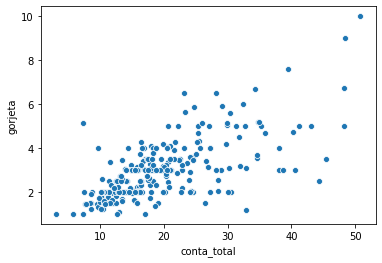

In [21]:
graf_valor_gorjeta=sns.scatterplot(x='conta_total', y='gorjeta', data=data)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [22]:
print('A base de dados contém {} registros \n'.format(data.shape[0]))
print('Registros não nulos:')
data.count()

A base de dados contém 244 registros 

Registros não nulos:


conta_total    244
gorjeta        244
sobremesa      244
dia            244
horario        244
clientes       244
dtype: int64

## Campo porcentagens

In [25]:
data.head(1)

,conta_total,gorjeta,sobremesa,dia,horario,clientes
0,16.99,1.01,False,Domingo,Janta,2


In [31]:
data['porcentagem']=data['gorjeta']/data['conta_total'].round(4)

In [32]:
data['porcentagem']=data['porcentagem'].round(4)
data.head(1)

,conta_total,gorjeta,sobremesa,dia,horario,clientes,porcentagem
0,16.99,1.01,False,Domingo,Janta,2,0.0594


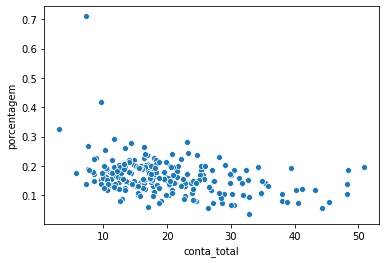

In [33]:
porcentagem_conta= sns.scatterplot(x='conta_total',y='porcentagem', data=data)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

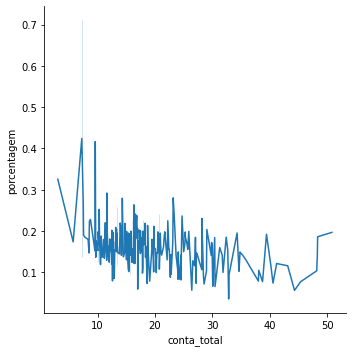

In [35]:
porcentagem_conta_linha= sns.relplot(x='conta_total', y='porcentagem', kind='line', data=data)

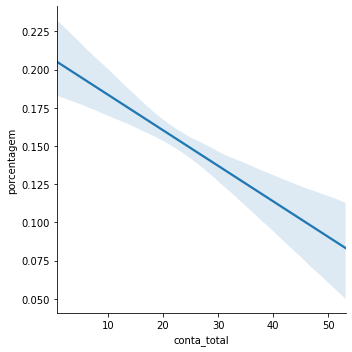

In [37]:
sns.lmplot(x='conta_total',y='porcentagem', data=data, scatter=False)

# Análise || - Sobremesa

In [40]:
data.head(1)

,conta_total,gorjeta,sobremesa,dia,horario,clientes,porcentagem
0,16.99,1.01,False,Domingo,Janta,2,0.0594


In [48]:
data[data['sobremesa']==True].describe()['gorjeta']

count    93.000000
mean      3.008710
std       1.401468
min       1.000000
25%       2.000000
50%       3.000000
75%       3.680000
max      10.000000
Name: gorjeta, dtype: float64

In [49]:
data[data['sobremesa']==False].describe()['gorjeta']

count    151.000000
mean       2.991854
std        1.377190
min        1.000000
25%        2.000000
50%        2.740000
75%        3.505000
max        9.000000
Name: gorjeta, dtype: float64

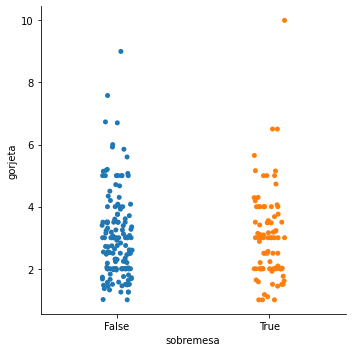

In [51]:
sns.catplot(x='sobremesa', y='gorjeta', data=data) #Grafico categórico


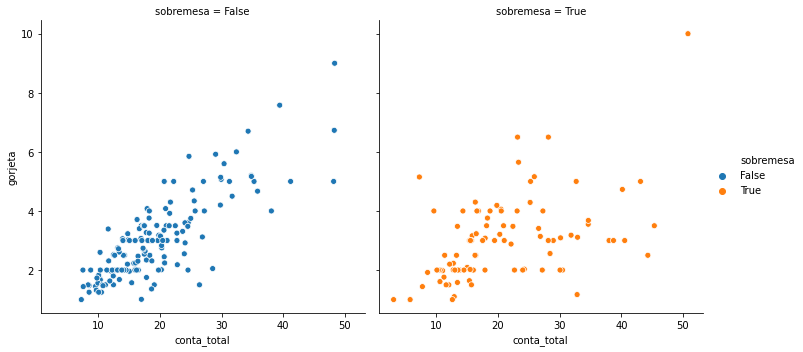

In [55]:
sns.relplot(x='conta_total', y='gorjeta', data=data, hue='sobremesa', col='sobremesa')

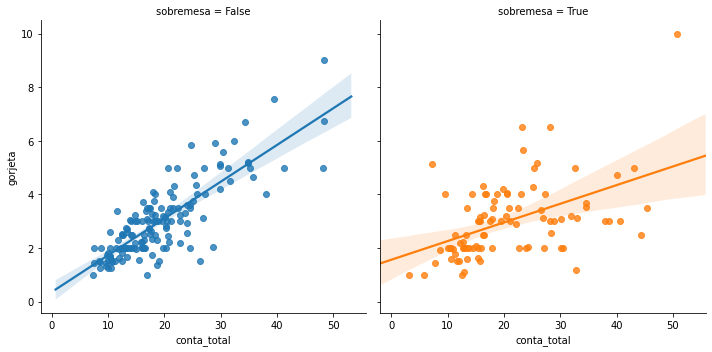

In [57]:
sns.lmplot(x='conta_total', y='gorjeta', col='sobremesa',hue='sobremesa', data=data)